In [1]:
import csv
import matplotlib.pyplot as plt

In [15]:
# store all rows
all_rows = []
with open('exoplanet_archive_data.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
         all_rows.append(row)
            
# remove headers
data_rows = all_rows[21:]

# extract planets with RV 
RV_rows = []
for row in data_rows:
    if 'Radial Velocity' in row[3]:
        RV_rows.append(row)

# extract planets with both e and a stored
ea_rows = []
for row in RV_rows:
    a = row[4]
    e = row[8]
    if (a!='') and (e!=''):
        ea_rows.append(row)

# require that sigma_e<0.2
low_sigma_rows = []
for row in ea_rows:
    sigma_e1 = row[9]
    sigma_e2 = row[10]
    if (sigma_e1!=''):
        if (float(sigma_e1)<0.2) and (float(sigma_e2)<0.2):
            low_sigma_rows.append(row)

In [16]:
# color code stars with companions by separation
GAIA_binary_names = []
GAIA_binary_lines = open('Mugrauer2018_table4.csv').readlines()
for line in GAIA_binary_lines:
    split_line = line.split(',')
    str0 = split_line[0]
    # remove (EB) and (SB) endings
    if any(end in str0 for end in ['(SB)', '(EB)']):
        str0=str0[:-4]
    # remove companion A,B ending
    str1 = str0[:-2]
    # remoce dashes and spaces
    str2 =  str1.replace(' ','')
    str3 = str2.replace('-','')
    GAIA_binary_names.append(str3)

In [17]:
# extract out existing binaries
existing_binary_rows = []
for row in low_sigma_rows:
    # check for existing binaries in table
    if any(companion in row[0][-2:] for companion in [' A',' B',' C']):
        existing_binary_rows.append(row)

In [18]:
# extract out GAIA binaries
GAIA_binary_rows = []
for GAIA_binary_name in GAIA_binary_names:
# check if name is in archive
    for row in low_sigma_rows:
        str1 = row[0].replace(' ','')
        row_name = str1.replace('-','')
        if GAIA_binary_name in row_name:
            if row not in existing_binary_rows:
                GAIA_binary_rows.append(row)
                
# combine with other binaries
binary_rows = existing_binary_rows + GAIA_binary_rows

In [19]:
# get single star rows
single_star_rows = []
for row in low_sigma_rows:
    if row not in binary_rows:
        single_star_rows.append(row)

In [20]:
a_s = [];e_s = [];a_b = [];e_b = []
for row in low_sigma_rows:
    a = row[4]
    e = row[8]
    if (a!='') and (e!=''):
        if row in single_star_rows:
            a_s.append(float(a))
            e_s.append(float(e))
        elif row in binary_rows:
            a_b.append(float(a))
            e_b.append(float(e))

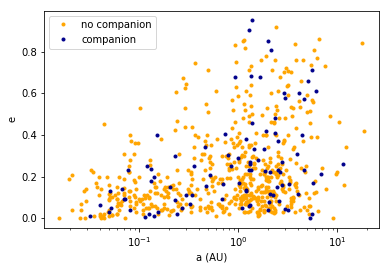

In [21]:
plt.plot(a_s,e_s,'.', color='orange',label='no companion')
plt.plot(a_b,e_b,'.', color='darkblue',label='companion')
plt.xlabel('a (AU)');plt.ylabel('e');plt.xscale('log');plt.legend()

In [22]:
separations_list = []
for line in GAIA_binary_lines:
    split_line = line.split(',')
    a = float(split_line[4])
    separations_list.append(a)

GAIA_dict = dict(zip(GAIA_binary_names, separations_list))

In [23]:
# extract out GAIA binaries
GAIA_binary_rows = []
GAIA_binary_separations = []
for GAIA_binary_name in GAIA_binary_names:
# check if name is in archive
    for row in low_sigma_rows:
        str1 = row[0].replace(' ','')
        row_name = str1.replace('-','')
        if GAIA_binary_name in row_name:
            if row not in existing_binary_rows:
                GAIA_binary_rows.append(row)
                GAIA_binary_separations.append(GAIA_dict[GAIA_binary_name])

In [24]:
a_b_sep_500 = [];e_b_sep_500 = []
a_b_sep_1000 = [];e_b_sep_1000 = []
a_b_sep_far = [];e_b_sep_far = []

for i in range(len(GAIA_binary_rows)):
    row = GAIA_binary_rows[i]
    a = row[4]
    e = row[8]
    binary_sep = GAIA_binary_separations[i]

    if binary_sep < 500:
        a_b_sep_500.append(float(a))
        e_b_sep_500.append(float(e))
    elif binary_sep < 1000:
        a_b_sep_1000.append(float(a))
        e_b_sep_1000.append(float(e))
    else:
        a_b_sep_far.append(float(a))
        e_b_sep_far.append(float(e))   

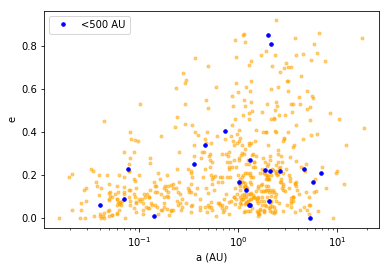

In [25]:
plt.plot(a_s,e_s,'.', color='orange', alpha=0.5)
plt.plot(a_b_sep_500,e_b_sep_500,'.', color='blue',markersize=7, label='<500 AU')
plt.xlabel('a (AU)');plt.ylabel('e');plt.xscale('log');plt.legend()

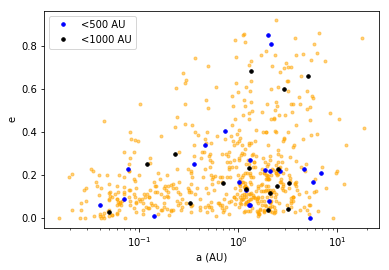

In [26]:
plt.plot(a_s,e_s,'.', color='orange', alpha=0.5)
plt.plot(a_b_sep_500,e_b_sep_500,'.', color='blue',markersize=7, label='<500 AU')
plt.plot(a_b_sep_1000,e_b_sep_1000,'.', color='black',markersize=7, label='<1000 AU')
plt.xlabel('a (AU)');plt.ylabel('e');plt.xscale('log');plt.legend()

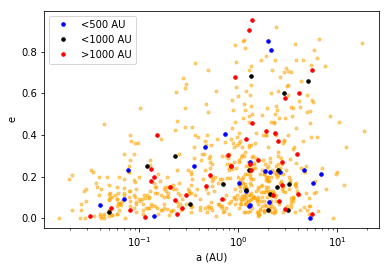

In [27]:
plt.plot(a_s,e_s,'.', color='orange', alpha=0.5)
plt.plot(a_b_sep_500,e_b_sep_500,'.', color='blue',markersize=7, label='<500 AU')
plt.plot(a_b_sep_1000,e_b_sep_1000,'.', color='black',markersize=7, label='<1000 AU')
plt.plot(a_b_sep_far,e_b_sep_far,'.', color='red',markersize=7, label='>1000 AU')
plt.xlabel('a (AU)');plt.ylabel('e');plt.xscale('log');plt.legend()